<a href="https://colab.research.google.com/github/skeeperloyaltie/my_colabs_R/blob/main/spatial_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spatial Modelling

In [ ]:
install.packages("geoR")
install.packages("raster")
install.packages("nlme")
library(geoR)
library(raster) 
library(nlme)

In [53]:
data <- read.csv('kuroshio.csv')
data <- na.omit(data)
head(data)

,date,lon,lat,id,pt,sst,sf,at,af
,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<int>
1,1996-01-01 00:00:00,144.10,32.60,WATF,5,21.1,1,16.7,1
2,1996-01-01 00:00:00,141.40,36.50,MQWU7,5,11.7,1,7.2,1
3,1996-01-01 00:00:00,140.70,35.00,LATI4,5,18.2,1,11.0,1
4,1996-01-01 00:00:00,143.00,37.20,OWEB2,5,12.9,1,6.2,1
5,1996-01-01 00:00:00,149.44,30.19,21573,7,19.4,1,19.0,1
6,1996-01-01 01:00:00,142.10,38.70,MQWU,5,6.5,1,0.6,1


In [ ]:
gdata <- as.geodata(data,coords.col=2:3,data.col=6)
head(gdata)

In [55]:
dup <- dup.coords(gdata)
head(dup)

,dup,lon,lat,data
,<fct>,<dbl>,<dbl>,<dbl>
954,1,140.3,34.8,17.2
1577,1,140.3,34.8,17.0
1613,2,140.5,33.2,20.0
1619,2,140.5,33.2,20.0
335,3,140.5,34.8,20.6
1254,3,140.5,34.8,16.4


In [56]:
set.seed(213)
gdata2 <- jitterDupCoords(gdata,max=0.1,min=0.05)
head(gdata2)

,lon,lat
1,144.1000,32.60000
2,141.4636,36.49424
3,140.7000,35.00000
4,143.0000,37.20000
5,149.5064,30.14007
6,142.0937,38.64905
7,149.4400,30.19000
9,149.5400,30.16000
10,140.5000,34.40000
11,149.4566,30.11692


In [57]:
isotropy <- variog4(gdata2, max.dist = 1)
str(isotropy)

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing omnidirectional variogram
List of 5
 $ 0              :List of 21
  ..$ u               : num [1:13] 0.0385 0.1154 0.1923 0.2692 0.3462 ...
  ..$ v               : num [1:13] 1.05 7.86 10.7 8.67 9.03 ...
  ..$ n               : num [1:13] 31 128 104 163 256 330 362 510 285 518 ...
  ..$ sd              : num [1:13] 2.48 17.73 21.73 18.23 18.13 ...
  ..$ bins.lim        : num [1:14] 1.00e-12 7.69e-02 1.54e-01 2.31e-01 3.08e-01 ...
  ..$ output.type     : chr "bin"
  ..$ ind.bin 

In [58]:
# Model
m <- lon ~lat + date + pt + sst 
model <- lm(m, data = data)
str(model)

List of 13
 $ coefficients : Named num [1:364] 118.6723 0.1414 -0.0871 0.4646 -0.6599 ...
  ..- attr(*, "names")= chr [1:364] "(Intercept)" "lat" "date1996-01-01 01:00:00" "date1996-01-01 02:13:00" ...
 $ residuals    : Named num [1:981] 1.97 -1.05 -1.7 0.42 0.36 ...
  ..- attr(*, "names")= chr [1:981] "1" "2" "3" "4" ...
 $ effects      : Named num [1:981] -4533.1 -1.19 1.49 -4.9 0.5 ...
  ..- attr(*, "names")= chr [1:981] "(Intercept)" "lat" "date1996-01-01 01:00:00" "date1996-01-01 02:13:00" ...
 $ rank         : int 364
 $ fitted.values: Named num [1:981] 142 142 142 143 149 ...
  ..- attr(*, "names")= chr [1:981] "1" "2" "3" "4" ...
 $ assign       : int [1:364] 0 1 2 2 2 2 2 2 2 2 ...
 $ qr           :List of 5
  ..$ qr   : num [1:981, 1:364] -31.3209 0.0319 0.0319 0.0319 0.0319 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:981] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:364] "(Intercept)" "lat" "date1996-01-01 01:00:00" "date1996-01-01 02:13:00" ...
  .. ..- attr

In [52]:
#Modelling with Bayesian methods
library(bayesplot)
model1 <- round(coef(summary(model)), 3)
summary(model1)

    Estimate          Std. Error       t value           Pr(>|t|)     
 Min.   : -2.2420   Min.   :0.031   Min.   :-0.7680   Min.   :0.0000  
 1st Qu.:  0.7255   1st Qu.:1.797   1st Qu.: 0.2838   1st Qu.:0.1000  
 Median :  2.0660   Median :2.919   Median : 0.9580   Median :0.3385  
 Mean   :  2.5162   Mean   :2.425   Mean   : 1.0521   Mean   :0.4005  
 3rd Qu.:  3.5440   3rd Qu.:2.921   3rd Qu.: 1.6460   3rd Qu.:0.6855  
 Max.   :118.6720   Max.   :4.522   Max.   :26.2460   Max.   :0.9960  

# PART B

In [60]:
over <- read.csv("overturning.csv")
head(over)

,year,month,day,hour,Quarter,Days_since_start,Overturning_Strength
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2004,4,2,0,2,1.0,9.689933
2,2004,4,2,12,2,1.5,10.193495
3,2004,4,3,0,2,2.0,10.660849
4,2004,4,3,12,2,2.5,11.077229
5,2004,4,4,0,2,3.0,11.432414
6,2004,4,4,12,2,3.5,11.721769


In [69]:
over$year <- as.integer(over$year)
over$day <- as.numeric(over$day)
summary(over)

      year          month             day            hour       
 Min.   :2004   Min.   : 1.000   Min.   : 1.0   Min.   : 0.000  
 1st Qu.:2006   1st Qu.: 4.000   1st Qu.: 8.0   1st Qu.: 0.000  
 Median :2009   Median : 7.000   Median :16.0   Median : 0.000  
 Mean   :2009   Mean   : 6.533   Mean   :15.7   Mean   : 5.999  
 3rd Qu.:2011   3rd Qu.:10.000   3rd Qu.:23.0   3rd Qu.:12.000  
 Max.   :2014   Max.   :12.000   Max.   :31.0   Max.   :12.000  
    Quarter      Days_since_start Overturning_Strength
 Min.   :1.000   Min.   :   1.0   Min.   :-3.073      
 1st Qu.:2.000   1st Qu.: 911.2   1st Qu.:14.165      
 Median :3.000   Median :1821.5   Median :17.033      
 Mean   :2.513   Mean   :1821.5   Mean   :16.995      
 3rd Qu.:4.000   3rd Qu.:2731.8   3rd Qu.:20.131      
 Max.   :4.000   Max.   :3642.0   Max.   :30.822      

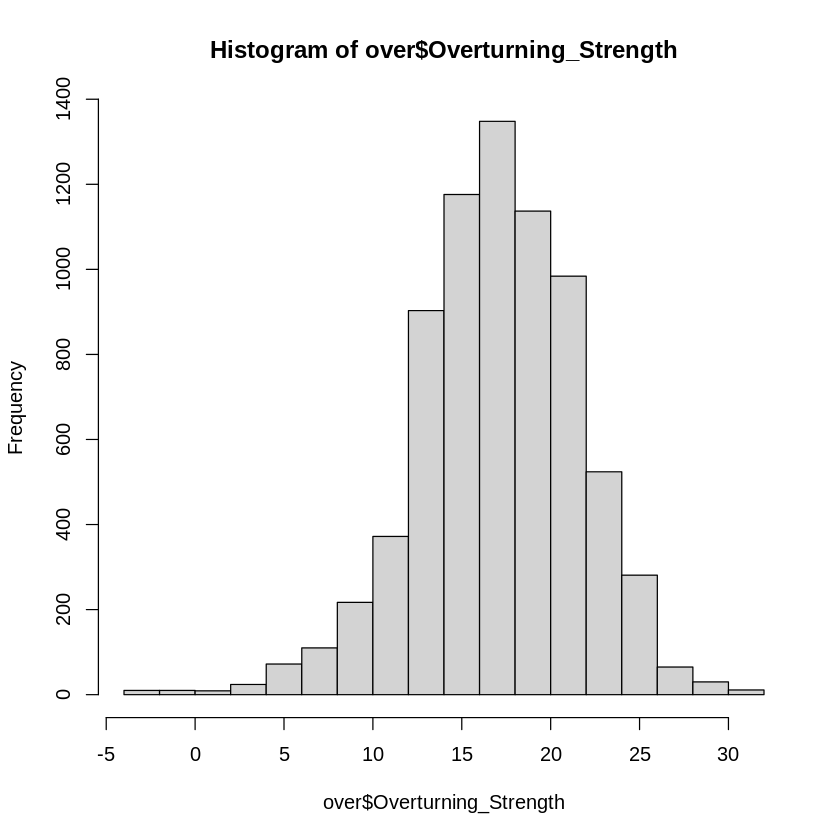

In [67]:
hist(over$Overturning_Strength)

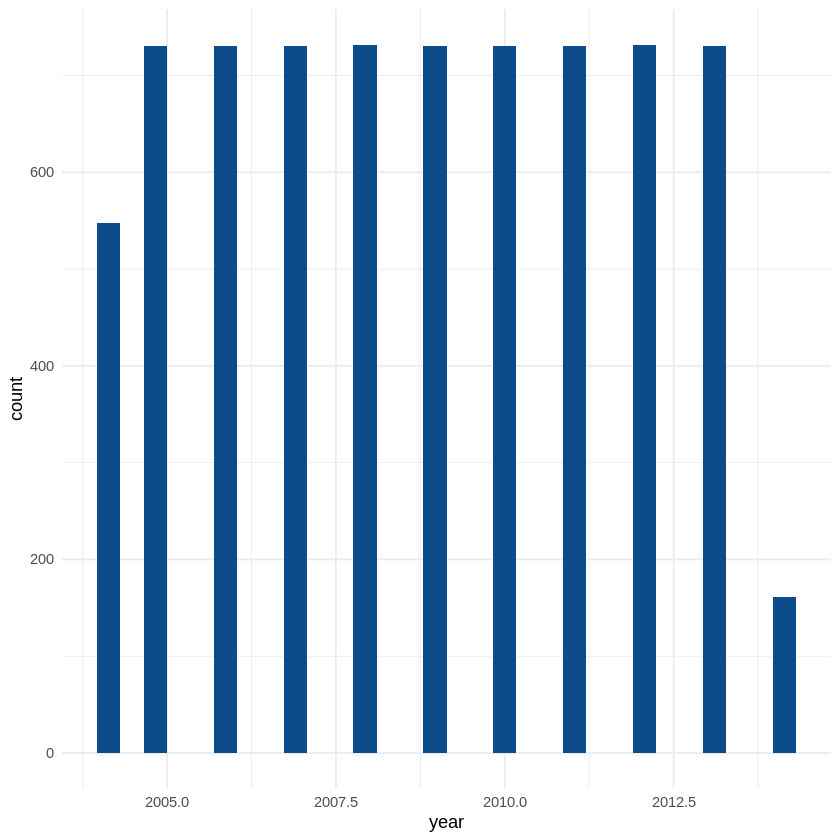

In [70]:
library(ggplot2)
ggplot(over) +
  aes(x = year) +
  geom_histogram(bins = 30L, fill = "#0c4c8a") +
  theme_minimal()

ARMA Model

In [74]:
set.seed(120)
arma <- arima.sim(n = 1000, model = over)
str(arma)

 Time-Series [1:1000] from 1 to 1000: -0.274 -0.4 -0.856 2.075 1.048 ...


ARMA MODEL

In [79]:
arima <- arima(over$year)
summary(arima)

          Length Class  Mode     
coef         1   -none- numeric  
sigma2       1   -none- numeric  
var.coef     1   -none- numeric  
mask         1   -none- logical  
loglik       1   -none- numeric  
aic          1   -none- numeric  
arma         7   -none- numeric  
residuals 7283   ts     numeric  
call         2   -none- call     
series       1   -none- character
code         1   -none- numeric  
n.cond       1   -none- numeric  
nobs         1   -none- numeric  
model       10   -none- list     

DLM

In [100]:
library(dlm)
model_dlm <- dlmModARMA(over$Overturning_Strength)
summary(model_dlm)

    Length   Class  Mode   
m0      7283 -none- numeric
C0  53042089 -none- numeric
FF      7283 -none- numeric
V          1 -none- numeric
GG  53042089 -none- numeric
W   53042089 -none- numeric
JFF        0 -none- NULL   
JV         0 -none- NULL   
JGG        0 -none- NULL   
JW         0 -none- NULL   

# Project Part C

In [171]:
meta <- read.csv("metadataCA.csv")
max <- read.csv("MaxTempCalifornia.csv")

Numerical Analysis

In [162]:
max <- na.omit(max)
meta <- na.omit(meta)
head(meta)

,Location,Elev,Lat,Long,Ref_Lat,Ref_Long
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,San Francisco,45.7,37.7705,-122.4269,37.76889,-122.5156
2,Napa,4.3,38.2102,-122.2847,38.39222,-123.0892
3,San Diego,4.6,32.7336,-117.1831,32.72222,-117.2683
4,Fresno,100.0,36.7525,-119.7017,36.25833,-121.8389
5,Santa Cruz,39.6,36.9905,-121.9911,36.95528,-122.0933
6,Death Valley,-59.1,36.4622,-116.8669,35.41750,-120.8369


In [125]:
head(max)

,X,San.Francisco,Napa,San.Diego,Fresno,Santa.Cruz,Death.Valley,Ojai,Barstow,LA,CedarPark,Redding
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20120101,14.4,16.7,19.4,18.3,22.8,20.6,27.2,20.6,27.2,19.4,17.2
2,20120102,12.8,16.7,20.6,18.3,15.0,21.1,27.2,17.2,23.9,21.7,15.0
3,20120103,11.7,15.6,21.7,13.3,17.2,20.6,26.7,18.3,24.4,10.6,18.3
4,20120104,13.9,19.4,26.1,16.7,18.9,21.1,27.2,18.9,29.4,3.3,19.4
5,20120105,16.1,17.8,28.3,17.8,18.3,21.7,26.7,19.4,28.3,8.9,19.4
6,20120106,13.3,14.4,20.0,17.8,15.0,21.1,23.9,20.0,22.8,16.1,17.2


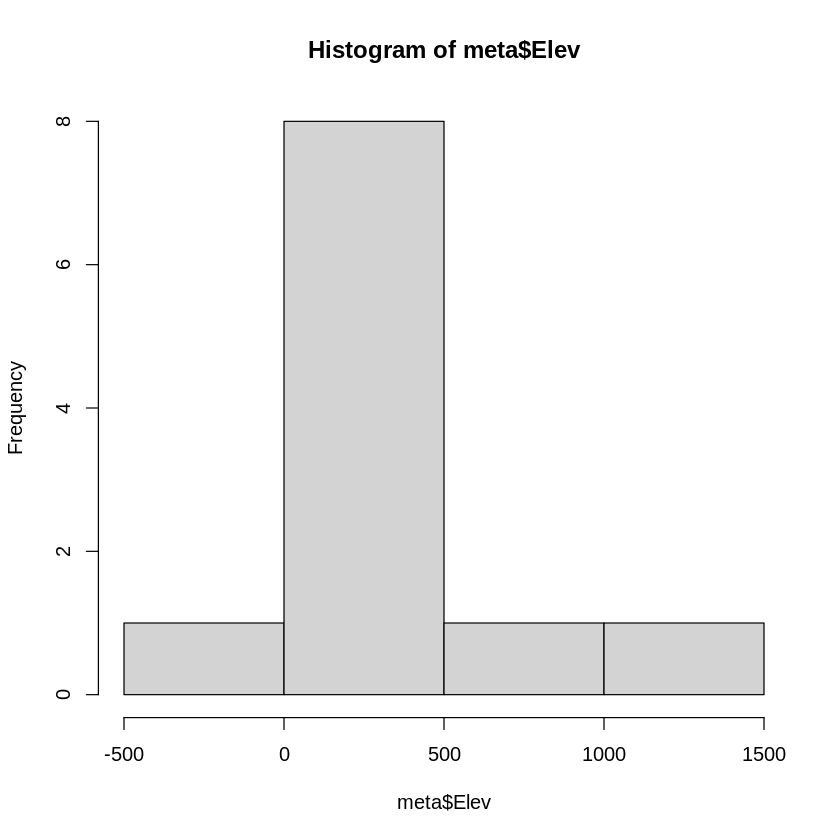

In [126]:
hist(meta$Elev)

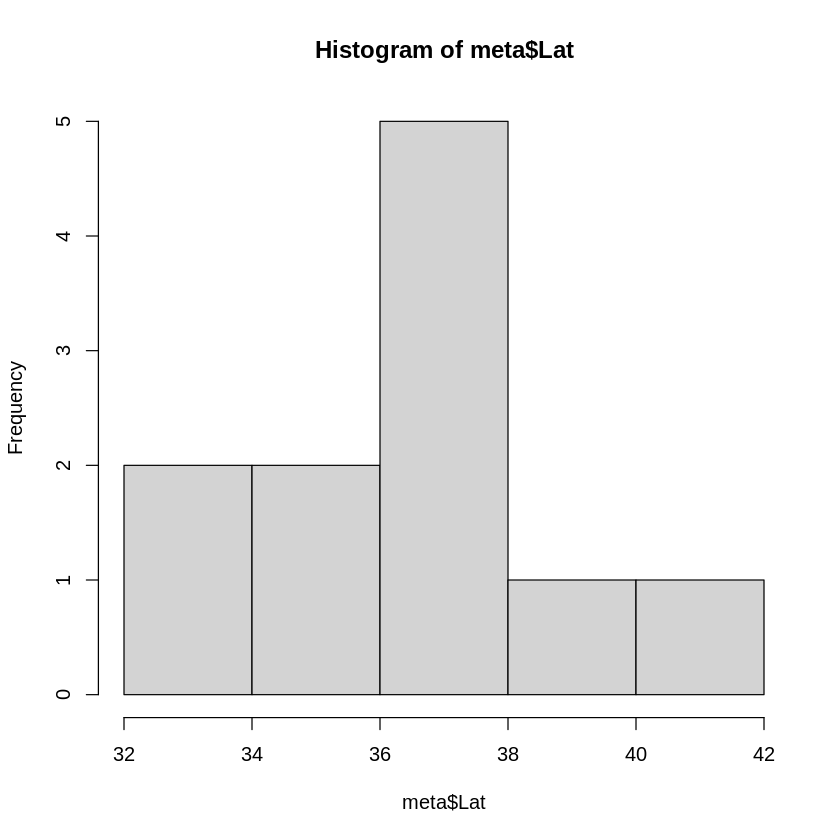

In [127]:
hist(meta$Lat)

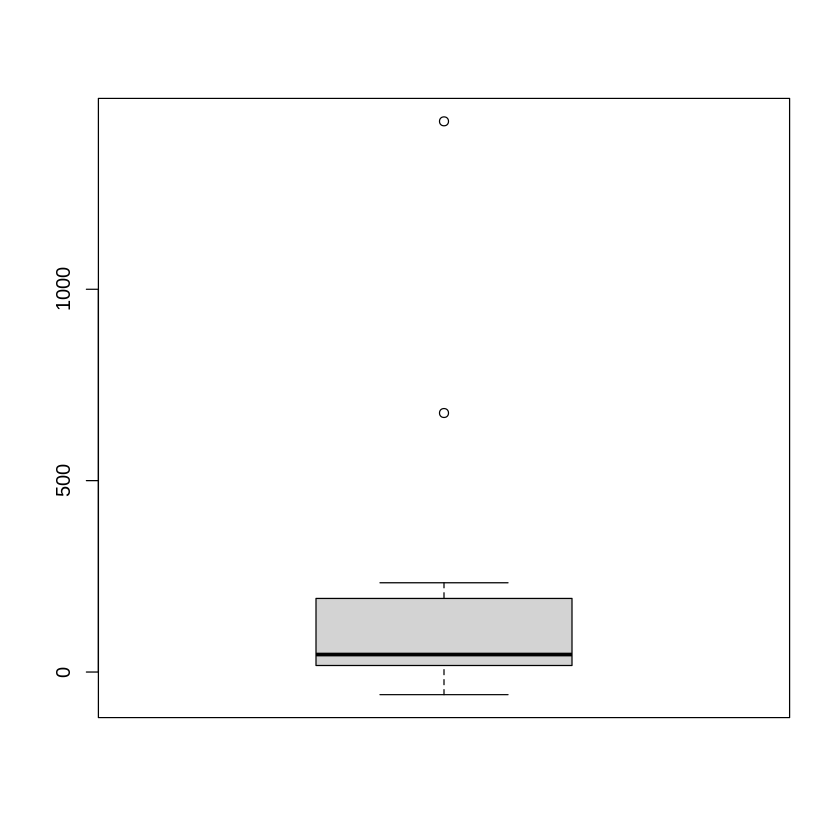

In [128]:
boxplot(meta$Elev)

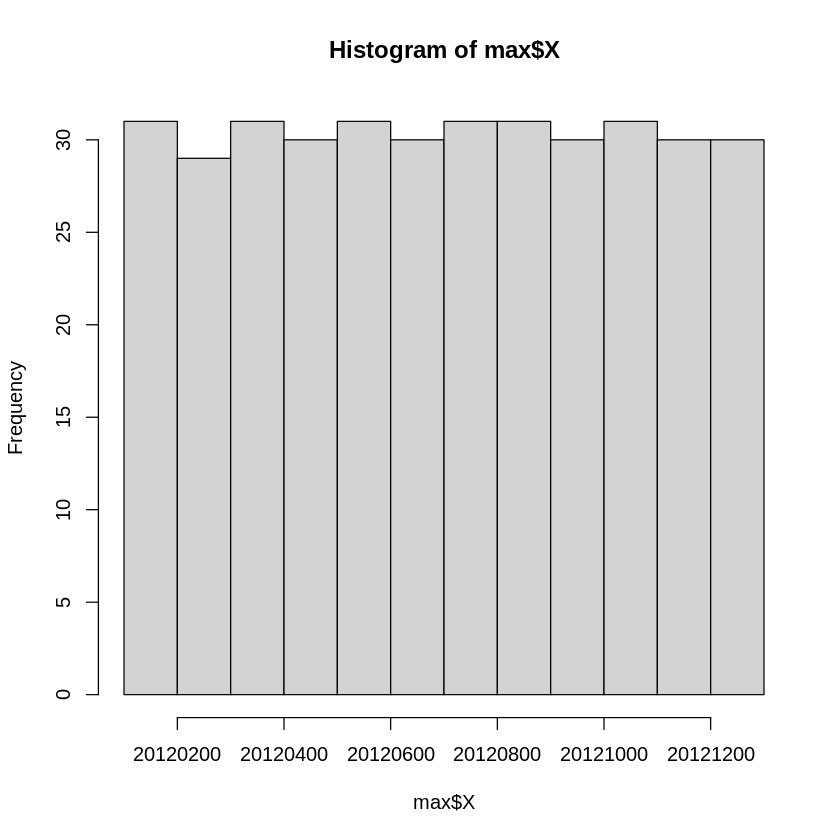

In [129]:
hist(max$X)

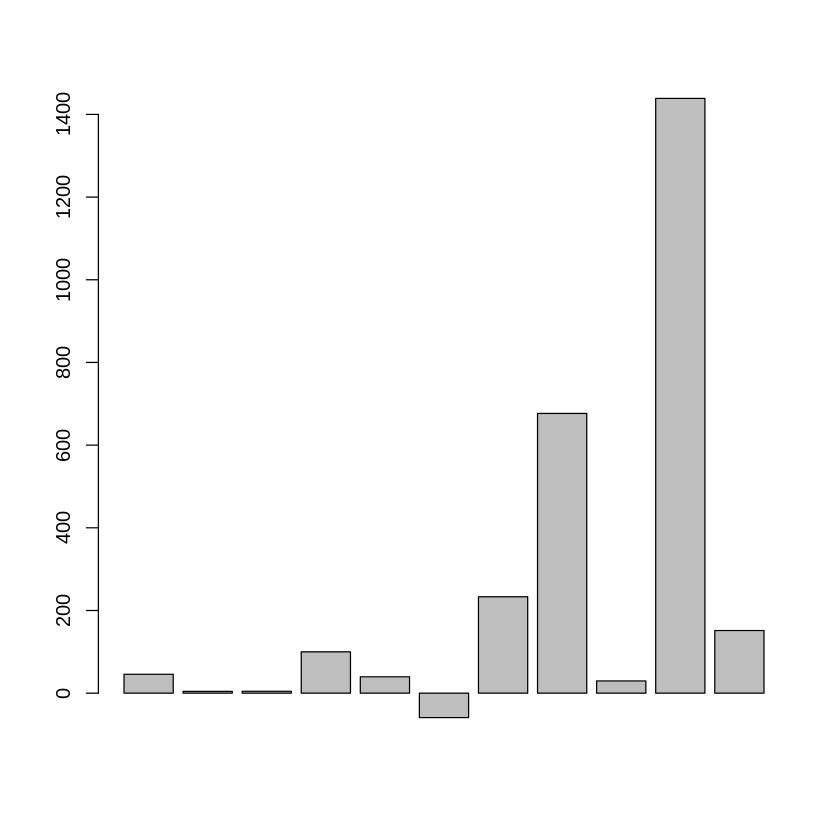

In [131]:
barplot(meta$Elev)

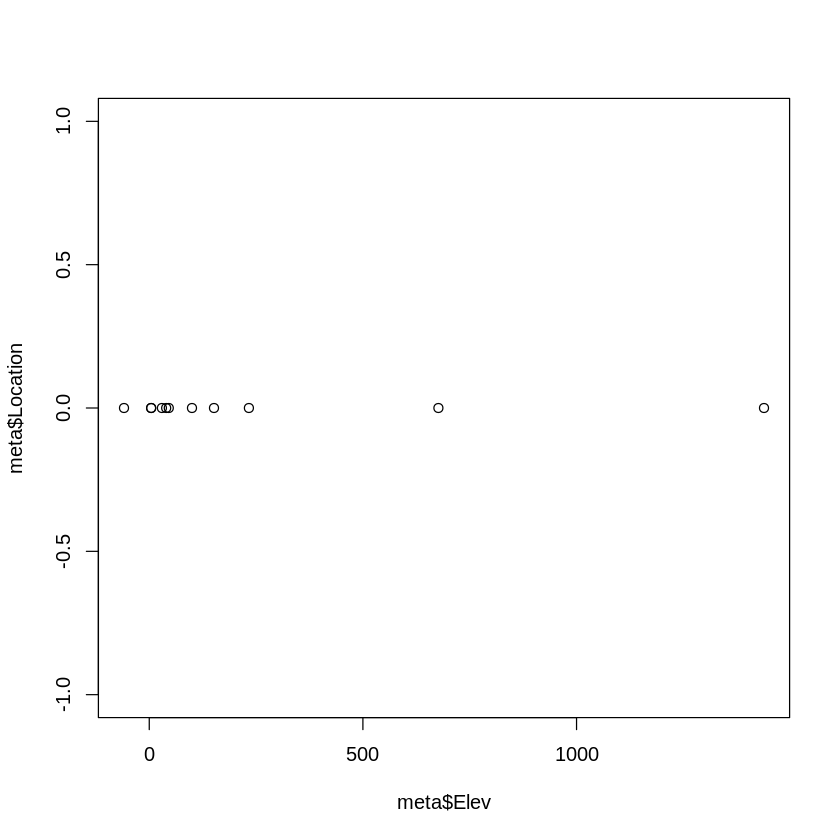

In [149]:

meta$Location <- (is.na(meta$Location) >"Location")
plot(meta$Elev, meta$Location)

# Prediction

In [153]:
model <- lm(Elev ~., data = meta)
pre <- predict(model)
pre

1           2           3           4           5           6 
-138.731790  270.216550   -8.641047  405.421445    3.782602  425.639847 
          7           8           9          10          11 
  53.849604  234.742550  450.921943  851.293650  116.304645


Call:
lm(formula = Napa ~ San.Diego + Fresno + Santa.Cruz + Ojai + 
    Barstow + CedarPark, data = max)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9006 -1.4416 -0.2504  1.2001  8.4358 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.1167830  0.7660115   2.763  0.00602 ** 
San.Diego   -0.1024762  0.0504369  -2.032  0.04291 *  
Fresno       0.2746623  0.0398727   6.888 2.55e-11 ***
Santa.Cruz   0.6206545  0.0415248  14.947  < 2e-16 ***
Ojai         0.0701084  0.0444561   1.577  0.11567    
Barstow     -0.0003237  0.0315272  -0.010  0.99181    
CedarPark   -0.0345132  0.0240048  -1.438  0.15138    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.261 on 358 degrees of freedom
Multiple R-squared:  0.8369,	Adjusted R-squared:  0.8341 
F-statistic: 306.1 on 6 and 358 DF,  p-value: < 2.2e-16


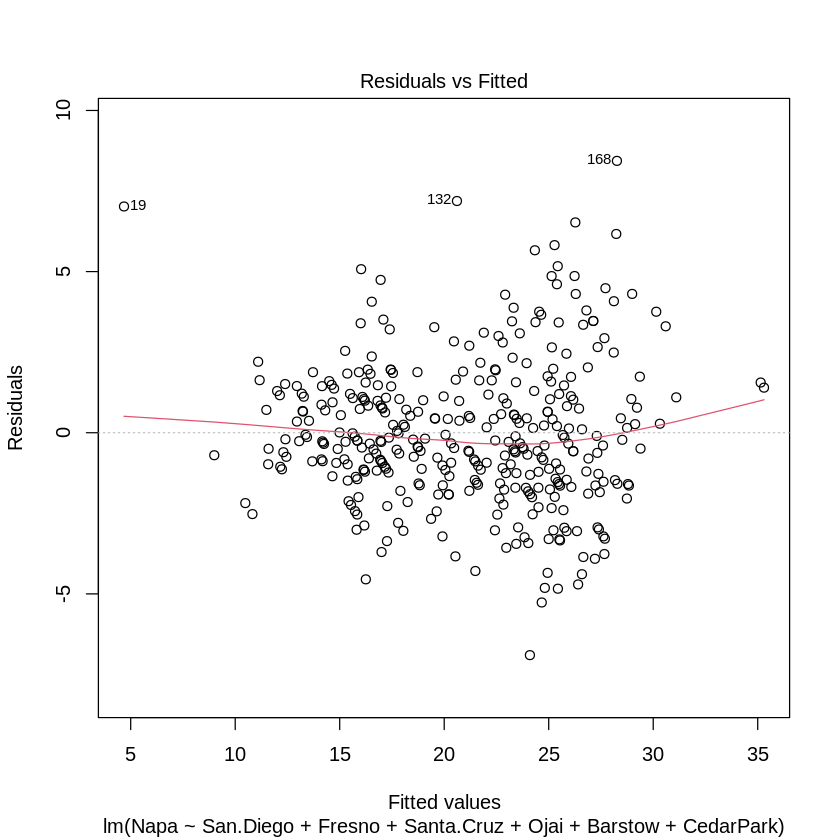

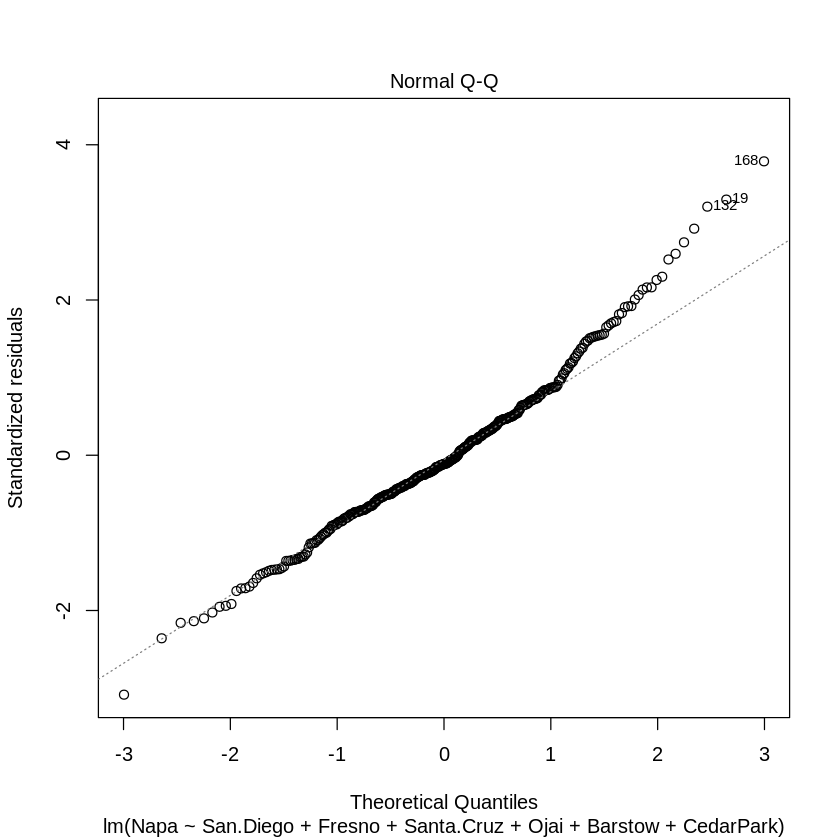

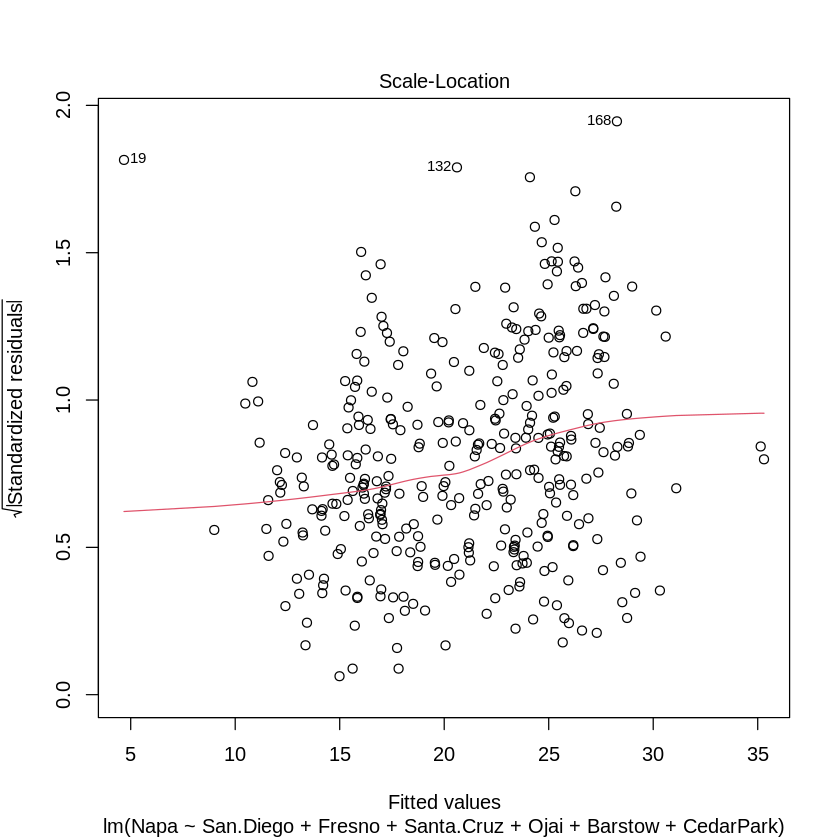

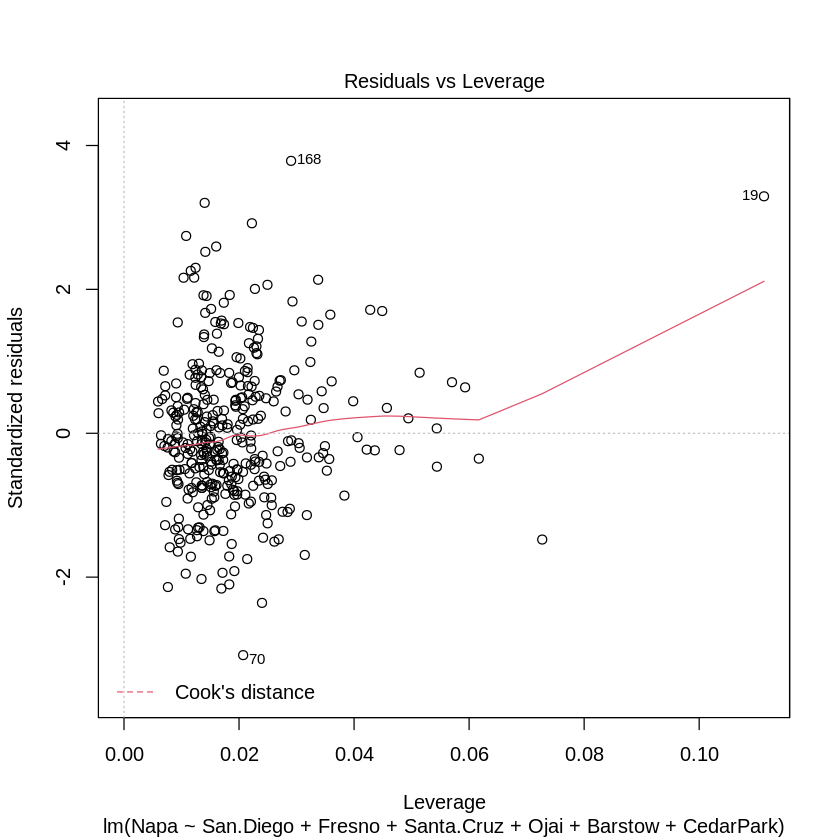

In [156]:
spa_model <- lm(Napa ~ San.Diego + Fresno + Santa.Cruz + Ojai + Barstow + CedarPark, data = max)
summary(spa_model)
plot(spa_model)

# Report

In [176]:
model_factor <- lm(X ~., data = max)
model_factor



Call:
lm(formula = X ~ ., data = max)

Coefficients:
  (Intercept)  San.Francisco           Napa      San.Diego         Fresno  
    2.012e+07      4.332e+01     -1.507e+01      3.863e+01      9.533e+00  
   Santa.Cruz   Death.Valley           Ojai        Barstow             LA  
   -2.081e+01      3.569e+00     -9.594e+00     -1.388e+00     -1.806e+00  
    CedarPark        Redding  
   -1.737e+00     -5.114e+00  


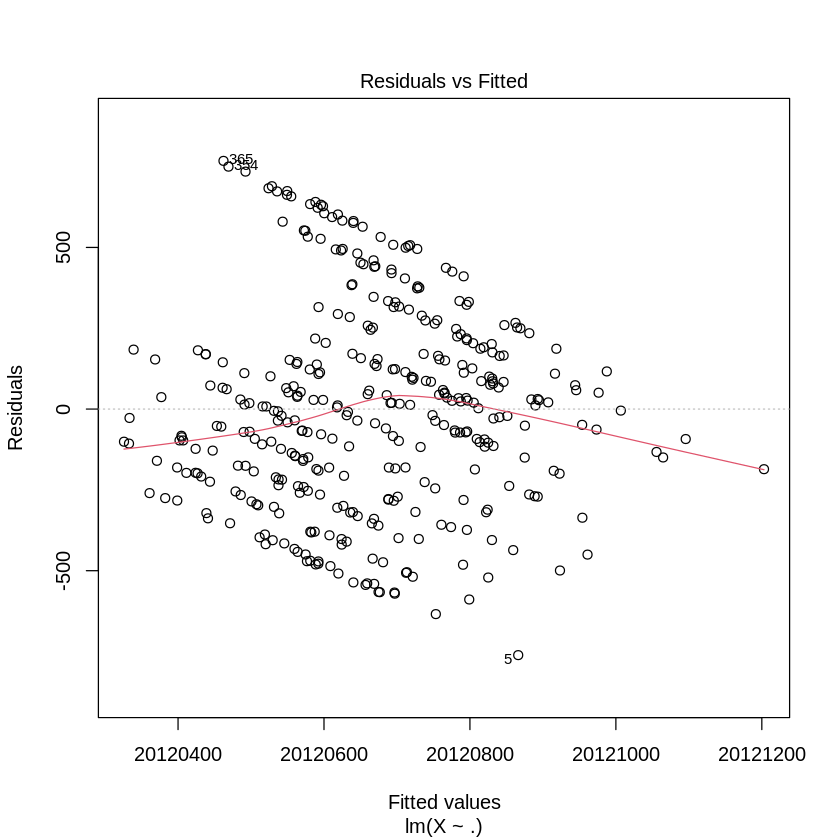

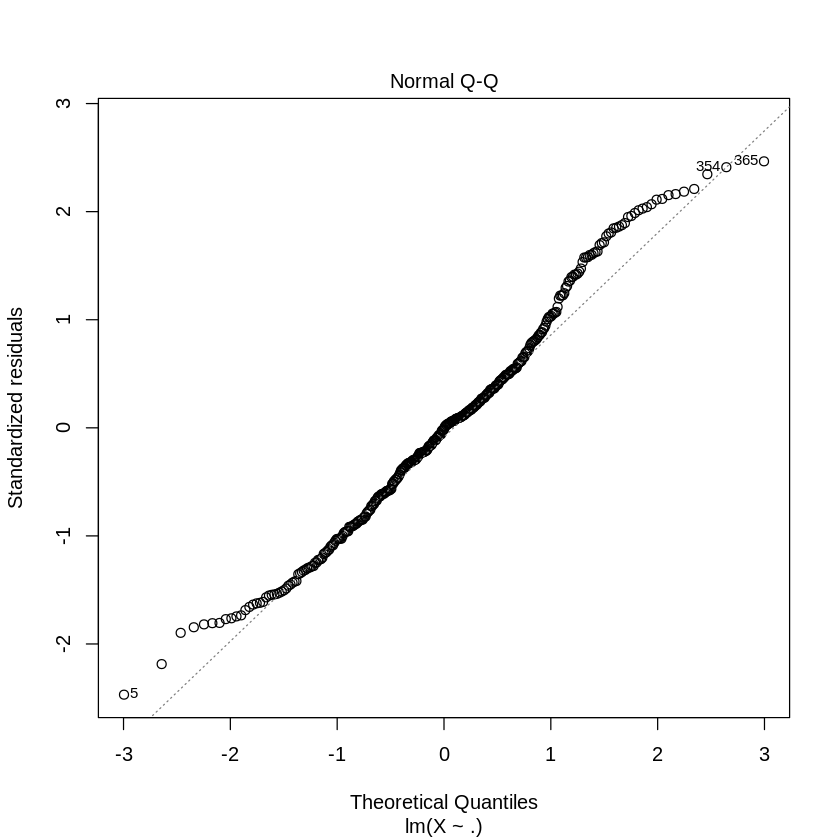

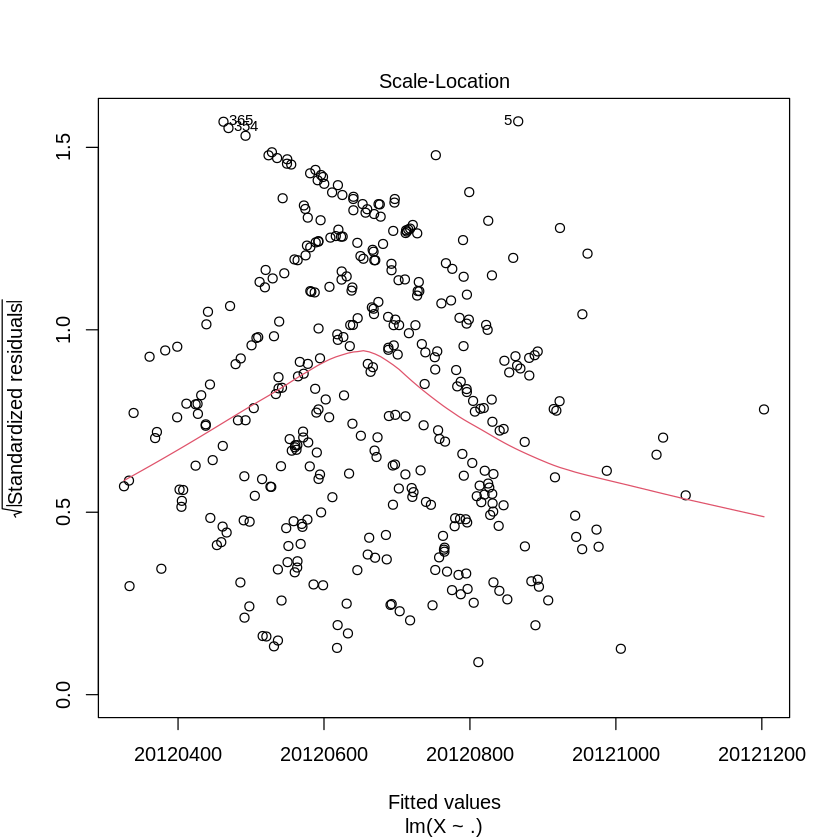

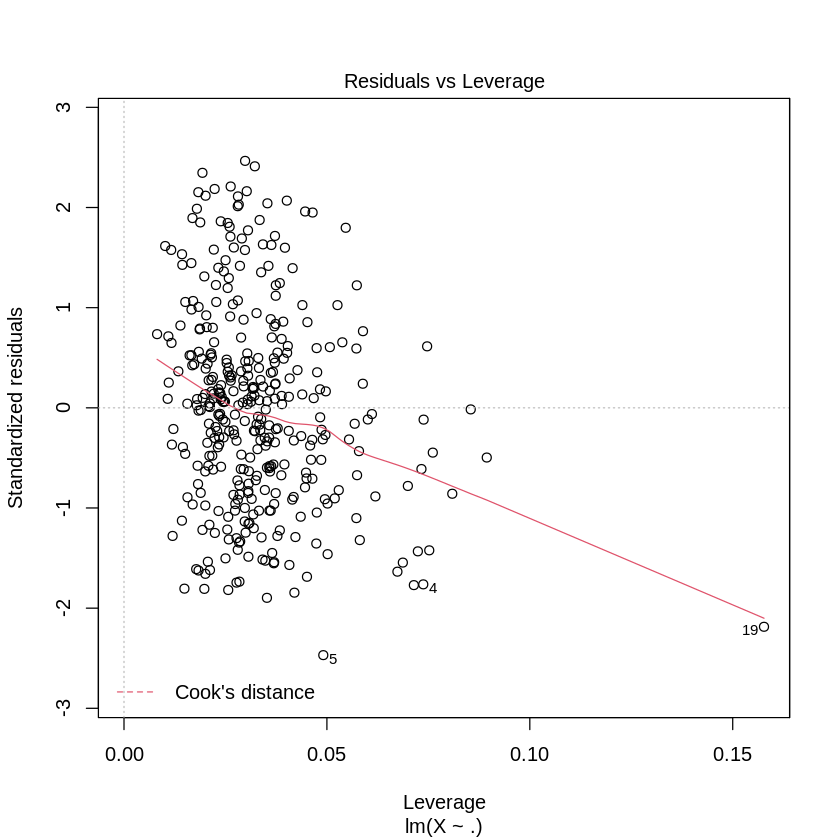

In [177]:
plot(model_factor)